# Load and clean data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn import metrics

from datetime import datetime
import re as re


## Load and combine datasets

#### Listings data for San Francisco

In [2]:
sf = pd.read_csv('../Data/listings_SF.csv')

print(f'San Francisco listings data: {sf.shape}')

# add column city
sf['county'] = 'San Francisco'
print(f'San Francisco listings data: {sf.shape}')

San Francisco listings data: (6508, 74)
San Francisco listings data: (6508, 75)


In [3]:
sf.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county
0,958,https://www.airbnb.com/rooms/958,2.021110e+13,11/2/21,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.98,4.78,City Registration Pending,f,1,1,0,0,3.57,San Francisco
1,5858,https://www.airbnb.com/rooms/5858,2.021110e+13,11/2/21,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.77,4.68,NaN,f,1,1,0,0,0.76,San Francisco
2,7918,https://www.airbnb.com/rooms/7918,2.021110e+13,11/2/21,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,4.73,4.00,NaN,f,9,0,9,0,0.17,San Francisco
3,8142,https://www.airbnb.com/rooms/8142,2.021110e+13,11/2/21,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,4.63,4.63,NaN,f,9,0,9,0,0.10,San Francisco
4,8339,https://www.airbnb.com/rooms/8339,2.021110e+13,11/2/21,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,4.94,4.75,STR-0000264,f,2,2,0,0,0.19,San Francisco


In [4]:
sf['neighbourhood'].value_counts()

San Francisco, California, United States                  4710
San Francisco, United States                                 2
San Francisco, Hayes Valley, California, United States       1
Noe Valley - San Francisco, California, United States        1
San Francisco , Ca, United States                            1
Name: neighbourhood, dtype: int64

In [5]:
sf['neighbourhood_cleansed'].value_counts()

Downtown/Civic Center    759
Mission                  557
Western Addition         460
South of Market          453
Nob Hill                 330
Bernal Heights           304
Haight Ashbury           299
Castro/Upper Market      293
Outer Sunset             260
Noe Valley               228
North Beach              190
Marina                   179
Financial District       178
Inner Richmond           169
Russian Hill             169
Bayview                  163
Pacific Heights          150
Potrero Hill             149
Outer Richmond           144
Chinatown                140
Inner Sunset             139
Excelsior                120
Parkside                 107
Outer Mission            107
Ocean View                88
West of Twin Peaks        85
Glen Park                 56
Visitacion Valley         49
Twin Peaks                47
Lakeshore                 43
Crocker Amazon            32
Presidio Heights          25
Diamond Heights           12
Seacliff                  11
Presidio      

#### Listings data for San Mateo county

In [6]:
sm = pd.read_csv('../Data/listings_SanMateo.csv')
print(f'San Mateo listings data: {sm.shape}')

# create columy county
sm['county'] = 'San Mateo'
print(f'San Mateo listings data: {sm.shape}')

San Mateo listings data: (2594, 74)
San Mateo listings data: (2594, 75)


In [7]:
sm.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county
0,39342,https://www.airbnb.com/rooms/39342,20211024154859,2021-10-25,"Palm Tree Cottage, Pacifica",30 NIGHT MINIMUM. Walk to Pacifica Beach from...,Quite neighborhood with easy walk to the beach.,https://a0.muscache.com/pictures/219887/f319d2...,127367,https://www.airbnb.com/users/show/127367,...,5.00,5.00,NaN,f,2,2,0,0,0.01,San Mateo
1,45287,https://www.airbnb.com/rooms/45287,20211024154859,2021-10-25,The Garden Cottage-a secluded nature retreat,1. WE ARE COMMITTED TO THE AIRBNB CLEANING PRO...,Our neighborhood was a vacation refuge for the...,https://a0.muscache.com/pictures/miso/Hosting-...,200479,https://www.airbnb.com/users/show/200479,...,4.89,4.82,NaN,f,1,1,0,0,2.66,San Mateo
2,55301,https://www.airbnb.com/rooms/55301,20211024154859,2021-10-25,Private Cottage with Chef's Kitchen & Washer/D...,"Charming, newly renovated garden cottage with ...",The cottage is located in the Willows of Menlo...,https://a0.muscache.com/pictures/4ead0b08-8014...,261070,https://www.airbnb.com/users/show/261070,...,4.85,4.83,NaN,t,1,1,0,0,0.38,San Mateo
3,63146,https://www.airbnb.com/rooms/63146,20211024154859,2021-10-25,Downtown Two Story Cottage,"<b>The space</b><br />Peaceful, elegant and pr...","The city itself borders Redwood City, Atherton...",https://a0.muscache.com/pictures/68b66a61-deca...,308176,https://www.airbnb.com/users/show/308176,...,NaN,NaN,NaN,f,1,1,0,0,0.03,San Mateo
4,72211,https://www.airbnb.com/rooms/72211,20211024154859,2021-10-25,3 BR Home on Vineyard nr Palo Alto & Stanford,Professionally cleaned (and disinfected) detac...,This is an ideal location - close to Palo Alto...,https://a0.muscache.com/pictures/miso/Hosting-...,101491,https://www.airbnb.com/users/show/101491,...,4.86,4.86,NaN,t,1,1,0,0,1.36,San Mateo


In [8]:
sm['neighbourhood'].value_counts()

Daly City, California, United States               275
Menlo Park, California, United States              189
San Mateo, California, United States               174
Redwood City, California, United States            154
Pacifica, California, United States                123
South San Francisco, California, United States     121
San Bruno, California, United States               101
Half Moon Bay, California, United States           100
East Palo Alto, California, United States           94
San Carlos, California, United States               92
Burlingame, California, United States               62
Millbrae, California, United States                 54
Foster City, California, United States              47
Belmont, California, United States                  40
Hillsborough, California, United States             36
Woodside, California, United States                 29
Moss Beach, California, United States               20
Emerald Hills, California, United States            18
Montara, C

In [9]:
sm['neighbourhood_cleansed'].value_counts()

Daly City               362
Unincorporated Areas    340
San Mateo               249
Redwood City            209
Menlo Park              207
South San Francisco     172
Pacifica                163
East Palo Alto          159
San Bruno               135
Burlingame              115
San Carlos              105
Millbrae                 72
Half Moon Bay            70
Foster City              70
Belmont                  62
Atherton                 29
Woodside                 28
Brisbane                 20
Hillsborough             12
Colma                     9
Portola Valley            6
Name: neighbourhood_cleansed, dtype: int64

In [10]:
# rename 'Unincorporated Areas' in sm dataset to 'San Mateo Unincorporated Areas'
sm.loc[sm['neighbourhood_cleansed']=='Unincorporated Areas', 'neighbourhood_cleansed'] = 'San Mateo Unincorporated Areas'
sm['neighbourhood_cleansed'].value_counts()

Daly City                         362
San Mateo Unincorporated Areas    340
San Mateo                         249
Redwood City                      209
Menlo Park                        207
South San Francisco               172
Pacifica                          163
East Palo Alto                    159
San Bruno                         135
Burlingame                        115
San Carlos                        105
Millbrae                           72
Half Moon Bay                      70
Foster City                        70
Belmont                            62
Atherton                           29
Woodside                           28
Brisbane                           20
Hillsborough                       12
Colma                               9
Portola Valley                      6
Name: neighbourhood_cleansed, dtype: int64

#### Listings data for Santa Clara county

In [11]:
sc = pd.read_csv('../Data/listings_SantaClara.csv')

print(f'San Clara listings data: {sc.shape}')

# add column county
sc['county'] = 'Santa Clara'
print(f'San Clara listings data: {sc.shape}')

San Clara listings data: (5218, 74)
San Clara listings data: (5218, 75)


In [12]:
sc.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county
0,4952,https://www.airbnb.com/rooms/4952,20211223003551,2021-12-23,Butterfly Inn near Stanford with weekly cleaning,Small private room with lovely garden setting ...,"Located in Professorville, Palo Alto, one of t...",https://a0.muscache.com/pictures/529448/3d73e0...,7054,https://www.airbnb.com/users/show/7054,...,4.89,4.78,NaN,f,5,0,5,0,0.50,Santa Clara
1,11464,https://www.airbnb.com/rooms/11464,20211223003551,2021-12-23,Deluxe Studio 5 min. to SC Kaiser & Apple Park,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,https://a0.muscache.com/pictures/121321/2c5a5a...,42458,https://www.airbnb.com/users/show/42458,...,4.86,4.64,NaN,f,14,14,0,0,0.15,Santa Clara
2,21373,https://www.airbnb.com/rooms/21373,20211223003551,2021-12-23,Bonsai Garden near Stanford with weekly cleaning,Small bedroom and desk Lovely garden setting i...,This room is in an ultra convenient location i...,https://a0.muscache.com/pictures/527285/0f9d08...,7054,https://www.airbnb.com/users/show/7054,...,4.96,4.75,NaN,f,5,0,5,0,1.87,Santa Clara
3,37512,https://www.airbnb.com/rooms/37512,20211223003551,2021-12-23,Private room - Parking 3 carport,We live in a safe community close to public tr...,Our community is a safe environment and at nig...,https://a0.muscache.com/pictures/47698055/32c3...,161741,https://www.airbnb.com/users/show/161741,...,4.48,4.70,NaN,f,2,0,2,0,1.32,Santa Clara
4,40560,https://www.airbnb.com/rooms/40560,20211223003551,2021-12-23,MOST COMFORTABLE BED EVER,"The ""Purple Room,"" as I call it, is great for ...",My neighborhood is lovely and a great place to...,https://a0.muscache.com/pictures/630306/19db9b...,174725,https://www.airbnb.com/users/show/174725,...,4.94,4.83,NaN,f,3,0,3,0,0.98,Santa Clara


In [13]:
# merge in neighborhood

In [14]:
sc['neighbourhood'].value_counts()

San Jose, California, United States           1405
Palo Alto, California, United States           397
Mountain View, California, United States       296
Santa Clara, California, United States         288
Sunnyvale, California, United States           278
Milpitas, California, United States             90
Cupertino, California, United States            81
Los Gatos, California, United States            79
Campbell, California, United States             78
Los Altos, California, United States            49
Saratoga, California, United States             42
Morgan Hill, California, United States          35
Gilroy, California, United States               22
Los Altos Hills, California, United States      20
Monte Sereno, California, United States         10
San Martin, California, United States            7
Menlo Park, California, United States            2
Hollister, California, United States             2
Sunnyvalle, California, United States            1
Los Gatos , California, United 

In [15]:
sc['neighbourhood_cleansed'].value_counts()

San Jose                2189
Palo Alto                586
Santa Clara              519
Sunnyvale                486
Mountain View            474
Unincorporated Areas     246
Milpitas                 161
Cupertino                153
Campbell                 131
Los Gatos                 67
Los Altos                 60
Saratoga                  51
Los Altos Hills           33
Morgan Hill               33
Gilroy                    16
Monte Sereno              13
Name: neighbourhood_cleansed, dtype: int64

In [16]:
# rename 'Unincorporated Areas' in sc dataset to 'Santa Clara Unincorporated Areas'
sc.loc[sc['neighbourhood_cleansed']=='Unincorporated Areas', 'neighbourhood_cleansed'] = 'Santa Clara Unincorporated Areas'
sc['neighbourhood_cleansed'].value_counts()

San Jose                            2189
Palo Alto                            586
Santa Clara                          519
Sunnyvale                            486
Mountain View                        474
Santa Clara Unincorporated Areas     246
Milpitas                             161
Cupertino                            153
Campbell                             131
Los Gatos                             67
Los Altos                             60
Saratoga                              51
Los Altos Hills                       33
Morgan Hill                           33
Gilroy                                16
Monte Sereno                          13
Name: neighbourhood_cleansed, dtype: int64

#### Combine datasets of 3 counties

In [17]:
# combine the 3 datasets
listings = pd.concat([sf, sm, sc], ignore_index=True)
listings.shape

(14320, 76)

In [18]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county,calendar_last_scraped
0,958,https://www.airbnb.com/rooms/958,2.021110e+13,11/2/21,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.78,City Registration Pending,f,1,1,0,0,3.57,San Francisco,NaN
1,5858,https://www.airbnb.com/rooms/5858,2.021110e+13,11/2/21,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.68,NaN,f,1,1,0,0,0.76,San Francisco,NaN
2,7918,https://www.airbnb.com/rooms/7918,2.021110e+13,11/2/21,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,4.00,NaN,f,9,0,9,0,0.17,San Francisco,NaN
3,8142,https://www.airbnb.com/rooms/8142,2.021110e+13,11/2/21,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,4.63,NaN,f,9,0,9,0,0.10,San Francisco,NaN
4,8339,https://www.airbnb.com/rooms/8339,2.021110e+13,11/2/21,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,4.75,STR-0000264,f,2,2,0,0,0.19,San Francisco,NaN


In [19]:
listings.tail()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county,calendar_last_scraped
14315,53940555,https://www.airbnb.com/rooms/53940555,2.021122e+13,2021-12-23,A place to call home | 3 BR in San Jose,Stay for 30+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/REAL_ESTATE_C...,359049232,https://www.airbnb.com/users/show/359049232,...,NaN,NaN,t,122,122,0,0,NaN,Santa Clara,2021-12-23
14316,53945814,https://www.airbnb.com/rooms/53945814,2.021122e+13,2021-12-23,"Premium San Jose 1BR w/ Pool & Gym, walk to Ca...",Show up and start living from day one in San J...,This furnished apartment is located in San Jos...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,...,NaN,NaN,t,243,243,0,0,NaN,Santa Clara,2021-12-23
14317,53945899,https://www.airbnb.com/rooms/53945899,2.021122e+13,2021-12-23,"Roomy Campbell 1BR w/ Gym, Pool & Hot Tub, wal...",Feel at home wherever you choose to live with ...,This furnished apartment is located in Campbel...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,...,NaN,NaN,t,243,243,0,0,NaN,Santa Clara,2021-12-23
14318,53950266,https://www.airbnb.com/rooms/53950266,2.021122e+13,2021-12-23,"Bright Sunnyvale 1BR w/ Pool, Gym & W/D, walk ...","Discover the best of Sunnyvale, with this one-...",This furnished apartment is in the heart of th...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,...,NaN,NaN,t,243,243,0,0,NaN,Santa Clara,2021-12-23
14319,53950313,https://www.airbnb.com/rooms/53950313,2.021122e+13,2021-12-23,"Roomy San Jose 1BR w/ Gym & Pool, good access ...",Feel at home wherever you choose to live with ...,This furnished apartment is located in San Jos...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,...,NaN,NaN,t,243,243,0,0,NaN,Santa Clara,2021-12-23


In [20]:
#listings.to_csv('../../Large_Data/listings_combined.csv')

## Clean data

### Set listing id as the index

In [21]:
listings.shape

(14320, 76)

In [22]:
# examine duplicates in id
listings['id'].duplicated().sum()

3

In [23]:
duplicated_id = listings.loc[listings['id'].duplicated(), 'id']
duplicated_id

9205      1398981
13782    52383961
13940    52903771
Name: id, dtype: int64

In [24]:
# records with these duplicated ids
listings.loc[listings['id'].isin(duplicated_id), ['id','county','neighbourhood_cleansed','last_scraped']].sort_values('id')

,id,county,neighbourhood_cleansed,last_scraped
6580,1398981,San Mateo,San Mateo Unincorporated Areas,2021-10-25
9205,1398981,Santa Clara,Palo Alto,2021-12-23
8979,52383961,San Mateo,San Mateo Unincorporated Areas,2021-10-25
13782,52383961,Santa Clara,Palo Alto,2021-12-23
9091,52903771,San Mateo,San Mateo Unincorporated Areas,2021-10-25
13940,52903771,Santa Clara,Palo Alto,2021-12-23


**Observation**: Three listing IDs are listed in San Mateo and Santa Clara. 

**Decision**: Drop the earlier record for each ID (San Mateo) and keep the last one (Santa Clara).

In [25]:
# drop rows with duplicated ids, keep the last
listings.drop_duplicates(subset='id', keep='last', inplace=True)
listings.shape

(14317, 76)

In [26]:
# make listing id as index
listings = listings.set_index(listings['id']).drop(columns=['id'])
listings.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county,calendar_last_scraped
id,,,,,,,,,,,,,,,,,,,,,
958,https://www.airbnb.com/rooms/958,2.021110e+13,11/2/21,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,Holly,...,4.78,City Registration Pending,f,1,1,0,0,3.57,San Francisco,NaN
5858,https://www.airbnb.com/rooms/5858,2.021110e+13,11/2/21,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,...,4.68,NaN,f,1,1,0,0,0.76,San Francisco,NaN
7918,https://www.airbnb.com/rooms/7918,2.021110e+13,11/2/21,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,Aaron,...,4.00,NaN,f,9,0,9,0,0.17,San Francisco,NaN
8142,https://www.airbnb.com/rooms/8142,2.021110e+13,11/2/21,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,Aaron,...,4.63,NaN,f,9,0,9,0,0.10,San Francisco,NaN
8339,https://www.airbnb.com/rooms/8339,2.021110e+13,11/2/21,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,Rosy,...,4.75,STR-0000264,f,2,2,0,0,0.19,San Francisco,NaN


### Check na's

In [27]:
listings.isnull().sum().sort_values(ascending=False).head(43)

neighbourhood_group_cleansed    14317
calendar_updated                14317
bathrooms                       14317
license                         10499
                                 7809
calendar_last_scraped            6508
neighbourhood                    4587
neighborhood_overview            4587
host_about                       4571
review_scores_checkin            3020
review_scores_value              3020
review_scores_location           3020
review_scores_communication      3019
review_scores_accuracy           3019
review_scores_cleanliness        3019
reviews_per_month                2956
first_review                     2956
review_scores_rating             2956
last_review                      2956
host_response_rate               2668
host_response_time               2668
host_acceptance_rate             2393
host_neighbourhood               1662
bedrooms                         1456
beds                              461
description                       276
host_locatio

In [28]:
listings.isnull().mean().sort_values(ascending=False).head(43)

neighbourhood_group_cleansed    1.000000
calendar_updated                1.000000
bathrooms                       1.000000
license                         0.733324
                                0.545435
calendar_last_scraped           0.454565
neighbourhood                   0.320388
neighborhood_overview           0.320388
host_about                      0.319271
review_scores_checkin           0.210938
review_scores_value             0.210938
review_scores_location          0.210938
review_scores_communication     0.210868
review_scores_accuracy          0.210868
review_scores_cleanliness       0.210868
reviews_per_month               0.206468
first_review                    0.206468
review_scores_rating            0.206468
last_review                     0.206468
host_response_rate              0.186352
host_response_time              0.186352
host_acceptance_rate            0.167144
host_neighbourhood              0.116086
bedrooms                        0.101697
beds            

In [29]:
# drop columns that are mostly missing: neighbourhood_group_cleansed, bathrooms, calendar_updated, license 
# drop neighbourhood (use neighbourhood_cleansed)

cols_drop = ['neighbourhood_group_cleansed','bathrooms','calendar_updated','license','neighbourhood']

listings.drop(columns=cols_drop, inplace=True)
print(listings.shape)

listings.isnull().mean().sort_values(ascending=False).head()

(14317, 70)


                          0.545435
calendar_last_scraped     0.454565
neighborhood_overview     0.320388
host_about                0.319271
review_scores_location    0.210938
dtype: float64

In [30]:
listings_na_df = pd.DataFrame(listings.isnull().mean().sort_values(ascending=False), columns=['na_perc'])
listings_na_df.head(40)

,na_perc
,0.545435
calendar_last_scraped,0.454565
neighborhood_overview,0.320388
host_about,0.319271
review_scores_location,0.210938
review_scores_checkin,0.210938
review_scores_value,0.210938
review_scores_accuracy,0.210868
review_scores_cleanliness,0.210868
review_scores_communication,0.210868


In [31]:
# create flag columns for the columns with many na's
print(listings.shape)
print()

cols_flag = ['neighborhood_overview','host_about','last_review','first_review','reviews_per_month',
             'host_response_time','host_response_rate','host_acceptance_rate','host_neighbourhood',
             'bedrooms']

for col in cols_flag:
    listings[col+'_f'] = np.where(listings[col].isnull(), 0, 1)

listings[['neighborhood_overview','host_about','last_review','first_review','reviews_per_month',
     'neighborhood_overview_f','host_about_f','last_review_f','first_review_f','reviews_per_month_f']]

print(listings.shape)

(14317, 70)

(14317, 80)


### Convert object columns to datetime: host since and review dates 

In [32]:
# https://www.statology.org/convert-datetime-to-date-pandas/

print(listings[['host_since', 'first_review', 'last_review']].info())
print()

# convert from string to datetime
listings[['host_since', 'first_review', 'last_review']] = listings[['host_since', 'first_review', 'last_review']].apply(lambda x: pd.to_datetime(x))
# keep date and drop time
listings[['host_since', 'first_review', 'last_review']] = listings[['host_since', 'first_review', 'last_review']].apply(lambda x: x.dt.normalize())

print(listings[['host_since', 'first_review', 'last_review']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14317 entries, 958 to 53950313
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   host_since    14303 non-null  object
 1   first_review  11361 non-null  object
 2   last_review   11361 non-null  object
dtypes: object(3)
memory usage: 447.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14317 entries, 958 to 53950313
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   host_since    14303 non-null  datetime64[ns]
 1   first_review  11361 non-null  datetime64[ns]
 2   last_review   11361 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 447.4 KB
None


In [33]:
listings[['host_since', 'first_review', 'last_review']].head()

,host_since,first_review,last_review
id,,,
958,2008-07-31,2014-10-05,2021-10-16
5858,2009-03-02,2009-11-24,2015-08-28
7918,2009-06-17,2012-08-27,2020-03-06
8142,2009-06-17,2015-03-03,2017-08-12
8339,2009-07-02,2009-09-25,2019-06-28


In [34]:
listings[['host_since', 'first_review', 'last_review']].describe(datetime_is_numeric=True)

,host_since,first_review,last_review
count,14303,11361,11361
mean,2015-11-29 08:15:08.117178112,2018-12-02 13:15:28.756271360,2021-02-03 23:34:00.982307840
min,2008-07-31 00:00:00,2009-08-02 00:00:00,2010-10-04 00:00:00
25%,2013-10-17 12:00:00,2017-07-03 00:00:00,2020-07-26 00:00:00
50%,2015-11-02 00:00:00,2019-04-30 00:00:00,2021-09-06 00:00:00
75%,2017-11-12 00:00:00,2020-11-21 00:00:00,2021-10-22 00:00:00
max,2021-12-19 00:00:00,2021-12-22 00:00:00,2021-12-22 00:00:00


In [35]:
# proportion of listings that have last review more than 6 mos ago
(listings['last_review'] < datetime.strptime('2021-05-01', '%Y-%m-%d')).mean()

0.2542432073758469

**Observation**: 
1. Some listings have their last reviews as early as 2010-10-04, about 1 year before the scraping time. 
2. For last review date, the mean is 2021-02-03 and the median is 2021-09-06, so the distribution is left skewed. The mean is pulled by outliers with early dates.
3. About 25% of the listings have their last review before 2021-05-01 (about 5 months before last scrape).

### Check on availability columns

In [36]:
# availability columns: availability_30, availability_60, availability_90, availability_365

listings[['availability_30', 'availability_60', 'availability_90', 'availability_365']].describe()

,availability_30,availability_60,availability_90,availability_365
count,14317.000000,14317.000000,14317.000000,14317.000000
mean,11.961584,28.591115,47.886149,184.600265
std,11.830674,23.288187,33.640412,133.619143
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,13.000000,61.000000
50%,9.000000,29.000000,53.000000,172.000000
75%,24.000000,53.000000,81.000000,326.000000
max,30.000000,60.000000,90.000000,365.000000


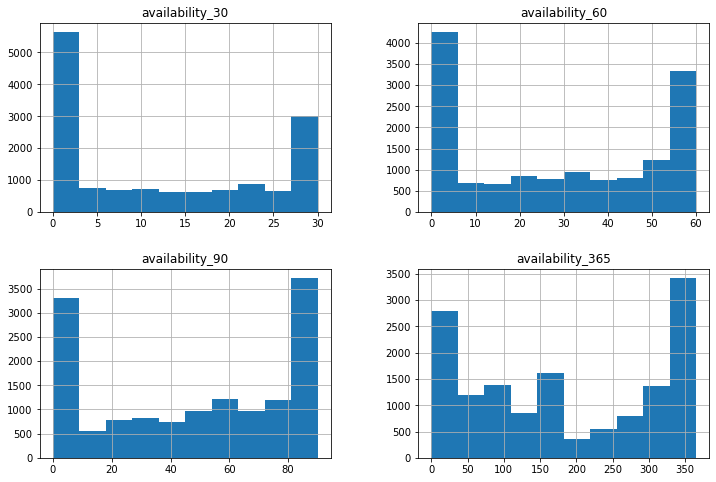

In [37]:
listings[['availability_30', 'availability_60', 'availability_90', 'availability_365']].hist(figsize=(12,8));

In [38]:
# proportion of listings that have the full availability for the duration
listings[['availability_30', 'availability_60', 'availability_90', 'availability_365']].apply(lambda x: (x==x.max()).mean())

availability_30     0.124258
availability_60     0.117972
availability_90     0.103653
availability_365    0.068799
dtype: float64

In [39]:
# proportion of listings that have 0 availability for the duration
listings[['availability_30', 'availability_60', 'availability_90', 'availability_365']].apply(lambda x: (x==0).mean())

availability_30     0.341552
availability_60     0.244395
availability_90     0.182021
availability_365    0.122512
dtype: float64

### Check on price 

In [40]:
# convert price to float
listings['price'] = listings['price'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(float)
listings['price'].describe()

count    14317.000000
mean       217.081931
std        640.443463
min          0.000000
25%         85.000000
50%        138.000000
75%        222.000000
max      25000.000000
Name: price, dtype: float64

In [41]:
# Examine distribution of listing price
np.quantile(listings['price'], [0.99, 0.995, 0.999])

array([1200., 1899., 9999.])

In [42]:
listings.groupby('county')['price'].mean()

county
San Francisco    235.649355
San Mateo        209.308761
Santa Clara      197.784017
Name: price, dtype: float64

In [43]:
listings.groupby('county')['price'].quantile(0.99)

county
San Francisco    1247.41
San Mateo        1077.90
Santa Clara      1200.00
Name: price, dtype: float64

In [44]:
(listings['price'] > 1000).mean()

0.013340783683732626

**Observation**:
1. The average listing price is around \$217 across the three counties, with the highest average price in San Francisco and the lowest in Santa Clara.
2. There are some listings with very high prices. 
> - 1.3% of the listings are more than \\$1000. 

**Decision**: Drop listings that are more than $1000/night, which composes 1.3% of the data.

In [45]:
# drop rows with price over $1500/night
listings = listings.loc[listings['price'] <= 1000, :]
listings.shape

(14126, 80)

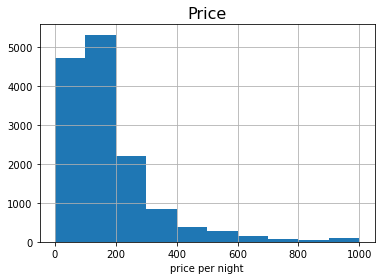

In [46]:
listings['price'].hist()
plt.title('Price', fontsize=16)
plt.xlabel('price per night'); 

plt.savefig('../Plots/price_hist.png')

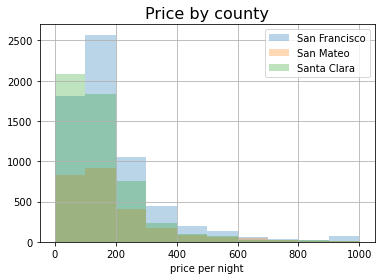

In [47]:
listings.groupby('county')['price'].hist(alpha=0.3, legend=True)
plt.legend()
plt.title('Price by county', fontsize=16)
plt.xlabel('price per night');

plt.savefig('../Plots/price_bycounty_hist.png')

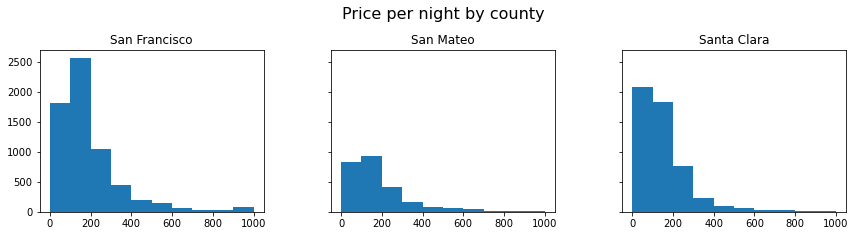

In [48]:
listings.hist(column='price', by='county', figsize=(14,3), layout=(1,3), xrot=0, legend=False, sharex=True, sharey=True)
;
plt.suptitle('Price per night by county', x=0.5, y=1.1, fontsize=16)
plt.savefig('../Plots/price_bycounty_hist2.png')

**Observation**: 
1. Most of the listings are below 300 dollar a night.
2. San Francisco and Santa Clara have more listings than San Mateo. 

### Check neighbourhood_cleansed, property type, room type

In [49]:
# Examine listings distribution by neighbourhood
count_by_neighbourhood = pd.DataFrame(listings['neighbourhood_cleansed'].value_counts(normalize=True)).rename(columns={'neighbourhood_cleansed':'proportion'})
count_by_neighbourhood['cum_prop'] = count_by_neighbourhood['proportion'].cumsum()
count_by_neighbourhood['count'] = listings['neighbourhood_cleansed'].value_counts()
count_by_neighbourhood['rank'] = count_by_neighbourhood['proportion'].rank(ascending=False)
count_by_neighbourhood.head(60)

,proportion,cum_prop,count,rank
San Jose,0.153688,0.153688,2171,1.0
Downtown/Civic Center,0.052810,0.206499,746,2.0
Palo Alto,0.040634,0.247133,574,3.0
Mission,0.039360,0.286493,556,4.0
Santa Clara,0.036104,0.322597,510,5.0
Sunnyvale,0.034263,0.356860,484,6.0
Mountain View,0.033414,0.390273,472,7.0
Western Addition,0.032139,0.422413,454,8.0
South of Market,0.031856,0.454269,450,9.0
Daly City,0.025556,0.479824,361,10.0


In [50]:
len(listings['neighbourhood_cleansed'].unique())  # totally 73 unique neighborhoods

73

**Observation**: 
1. There are totally 73 unique neighborhoods.  
2. The top 41 neighborhoods consist of 90% of the listings. The top 49 neighborhoods cnosist of 95% of the listings. 
3. 39 neighborhoods have at least 100 listings, which is 88% of the data.

**Decision**: For the neighborhoods that have less than 100 listings, classify them as "Other".  

In [51]:
neighbourhood_Other = list(count_by_neighbourhood.index[count_by_neighbourhood['count'] < 100])
neighbourhood_Other

['Ocean View',
 'West of Twin Peaks',
 'Millbrae',
 'Foster City',
 'Los Gatos',
 'Half Moon Bay',
 'Belmont',
 'Los Altos',
 'Glen Park',
 'Visitacion Valley',
 'Saratoga',
 'Twin Peaks',
 'Lakeshore',
 'Morgan Hill',
 'Los Altos Hills',
 'Crocker Amazon',
 'Atherton',
 'Presidio Heights',
 'Woodside',
 'Brisbane',
 'Gilroy',
 'Monte Sereno',
 'Diamond Heights',
 'Hillsborough',
 'Seacliff',
 'Presidio',
 'Colma',
 'Portola Valley',
 'Golden Gate Park']

In [52]:
listings['neighborhood_recoded'] = ['Other' if n in (neighbourhood_Other) else n for n in listings['neighbourhood_cleansed']]
listings.loc[listings['neighbourhood_cleansed'].isin(['Palo Alto','Twin Peaks']), ['neighborhood_recoded','neighbourhood_cleansed']]

,neighborhood_recoded,neighbourhood_cleansed
id,,
55636,Other,Twin Peaks
148769,Other,Twin Peaks
2510224,Other,Twin Peaks
2950592,Other,Twin Peaks
2968738,Other,Twin Peaks
...,...,...
53676206,Palo Alto,Palo Alto
53688023,Palo Alto,Palo Alto
53778140,Palo Alto,Palo Alto


In [53]:
# property_type distribution
count_by_property_type = pd.DataFrame(listings['property_type'].value_counts(normalize=True)).rename(columns={'property_type':'proportion'})
count_by_property_type['cum_prop'] = count_by_property_type['proportion'].cumsum()
count_by_property_type['count'] = listings['property_type'].value_counts()
count_by_property_type['rank'] = count_by_property_type['proportion'].rank(ascending=False)
count_by_property_type[count_by_property_type['count'] >= 50]

,proportion,cum_prop,count,rank
Entire rental unit,0.223630,0.223630,3159,1.0
Private room in residential home,0.193827,0.417457,2738,2.0
Entire residential home,0.155175,0.572632,2192,3.0
Entire guest suite,0.065553,0.638185,926,4.0
Entire condominium (condo),0.056846,0.695030,803,5.0
Private room in rental unit,0.050262,0.745292,710,6.0
Entire serviced apartment,0.038440,0.783732,543,7.0
Entire guesthouse,0.033484,0.817216,473,8.0
Room in boutique hotel,0.030299,0.847515,428,9.0
Room in hotel,0.020105,0.867620,284,10.0


In [54]:
len(listings['property_type'].unique())

81

**Observation**: 
1. There are 81 unique property types.
2. The top 12 property types consist of 90% of the listings. The top 17 consist of 95% of the listings. 
3. Property types with less than 100 listings consist of around 5% of the listings in total. 

**Decision**: For the property types that have less than 100 listings, classify them as "Other". This leaves 17 property types including "Other".

In [55]:
# recode property types with less than 100 listings
property_type_Other = list(count_by_property_type.index[count_by_property_type['count'] < 100])
#property_type_Other

listings['property_type_recoded'] = ['Other' if n in (property_type_Other) else n for n in listings['property_type']]
listings.loc[listings['property_type'].isin(['Entire loft','Entire bungalow']), ['property_type','property_type_recoded']]

,property_type,property_type_recoded
id,,
21334,Entire loft,Entire loft
329020,Entire loft,Entire loft
517803,Entire bungalow,Other
616517,Entire loft,Entire loft
715543,Entire loft,Entire loft
...,...,...
51992221,Entire bungalow,Other
52740491,Entire loft,Entire loft
52778157,Entire loft,Entire loft


In [56]:
# room_type
count_by_room_type = pd.DataFrame(listings['room_type'].value_counts(normalize=True)).rename(columns={'room_type':'proportion'})
count_by_room_type['cum_prop'] = count_by_room_type['proportion'].cumsum()
count_by_room_type['count'] = listings['room_type'].value_counts()
count_by_room_type['rank'] = count_by_room_type['proportion'].rank(ascending=False)
count_by_room_type

,proportion,cum_prop,count,rank
Entire home/apt,0.614895,0.614895,8686,1.0
Private room,0.355444,0.970338,5021,2.0
Shared room,0.023503,0.993841,332,3.0
Hotel room,0.006159,1.000000,87,4.0


### Check maximum_nights

In [57]:
# maximum_nights
listings['maximum_nights'].describe()

count    1.412600e+04
mean     1.526001e+05
std      1.806842e+07
min      1.000000e+00
25%      3.100000e+01
50%      3.650000e+02
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights, dtype: float64

In [58]:
listings['maximum_nights'].sort_values(ascending=False).head(20)

id
4624984     2147483647
14189398         10000
413663           10000
1703959          10000
4576349           9999
781945            1195
39987369          1125
39990860          1125
40026673          1125
40105176          1125
20247953          1125
39976840          1125
40156849          1125
40159312          1125
40165933          1125
40265537          1125
40310392          1125
40394974          1125
40404075          1125
40568972          1125
Name: maximum_nights, dtype: int64

In [59]:
np.quantile(listings['maximum_nights'], [.40, .50, .55, .99])

array([ 180.,  365.,  730., 1125.])

In [60]:
(listings['maximum_nights'] > 1125).mean()

0.0004247486903582047

**Observation**: 
1. For the maximum number of nights for each booking, its mean is 593 and median is 365., with the max as 1125.
2. Many listings have 1125 as the max nights, at least from 55 percentile to 999 percentile.

**Decision**: Drop rows with maximum nights above 1125

In [61]:
listings = listings.loc[listings['maximum_nights'] <= 1125, :]
listings.shape

(14120, 82)

### Prepare bathrooms_text
- create bathroom_type
- create bathrooms as the count

In [62]:
listings[['bathrooms_text']].isnull().mean()

bathrooms_text    0.001416
dtype: float64

In [63]:
listings.dropna(subset=['bathrooms_text'], inplace=True)
listings.shape

(14100, 82)

**Decision**: Drop rows with missing values for bathrooms_text, which drops less than 1% further. 

In [64]:
# bathrooms_text
listings['bathrooms_text'].value_counts()

1 bath               6231
2 baths              1848
1 private bath       1789
1 shared bath        1768
1.5 baths             485
3 baths               346
2.5 baths             344
1.5 shared baths      322
2 shared baths        308
3 shared baths        109
3.5 baths              86
2.5 shared baths       74
4 baths                66
5 shared baths         64
0 shared baths         48
4 shared baths         41
0 baths                32
4.5 baths              24
5 baths                23
10 shared baths        17
3.5 shared baths       17
Shared half-bath       13
Half-bath               9
Private half-bath       6
6 shared baths          6
5.5 baths               6
8 shared baths          5
6 baths                 5
10 baths                2
6.5 shared baths        2
4.5 shared baths        2
8 baths                 1
6.5 baths               1
Name: bathrooms_text, dtype: int64

##### Create bathroom_type

In [65]:
listings['bathroom_type'] = ['private' if re.findall('[Pp]rivate|[Ss]hared', s)==[] else s.lower() for s in listings['bathrooms_text']]
listings['bathroom_type']

id
958                private
5858               private
7918        4 shared baths
8142        4 shared baths
8339               private
                 ...      
53940555           private
53945814           private
53945899           private
53950266           private
53950313           private
Name: bathroom_type, Length: 14100, dtype: object

In [66]:
listings['bathroom_type'] = [re.findall('private|shared', s)[0] for s in listings['bathroom_type']]

# double check
listings[['bathrooms_text','bathroom_type']].head()

,bathrooms_text,bathroom_type
id,,
958,1 bath,private
5858,1 bath,private
7918,4 shared baths,shared
8142,4 shared baths,shared
8339,1.5 baths,private


##### Create 'bathrooms' as the count of bathrooms
- convert half bath to 0.5 bath
- extract numbers

In [67]:
listings['bathrooms'] = listings['bathrooms_text'].replace({'Shared half-bath' :'0.5 shared bath', 
                                                            'Private half-bath':'0.5 private bath',
                                                            'Half-bath'        :'0.5 bath'})

# double check
listings.loc[listings['bathrooms_text'].isin(['Shared half-bath','Private half-bath','Half-bath']), ['bathrooms_text','bathrooms']].head()

,bathrooms_text,bathrooms
id,,
193292,Half-bath,0.5 bath
465723,Half-bath,0.5 bath
2702606,Half-bath,0.5 bath
3015450,Private half-bath,0.5 private bath
4902565,Shared half-bath,0.5 shared bath


In [68]:
listings['bathrooms'] = [float(re.findall('\d+\.*\d*', s)[0]) for s in listings['bathrooms']]

# double check
listings[['bathrooms_text','bathroom_type','bathrooms']]

,bathrooms_text,bathroom_type,bathrooms
id,,,
958,1 bath,private,1.0
5858,1 bath,private,1.0
7918,4 shared baths,shared,4.0
8142,4 shared baths,shared,4.0
8339,1.5 baths,private,1.5
...,...,...,...
53940555,2 baths,private,2.0
53945814,1 bath,private,1.0
53945899,1 bath,private,1.0


### Clean amenities column
- "BBQ grill", "Outdoor furniture", "Dedicated workspace", "Backyard","Private entrance","Pool", "Patio or balcony", "Indoor fireplace","Wifi"

In [69]:
pd.options.display.max_colwidth = 500
listings[['amenities']].head()

,amenities
id,
958,"[""BBQ grill"", ""Outdoor furniture"", ""Free street parking"", ""Microwave"", ""Carbon monoxide alarm"", ""Cable TV"", ""Shampoo"", ""Hangers"", ""Room-darkening shades"", ""Private entrance"", ""Keypad"", ""TV with standard cable"", ""Essentials"", ""Dedicated workspace"", ""First aid kit"", ""Kitchen"", ""Backyard"", ""Hair dryer"", ""Pack \u2019n play/Travel crib"", ""Dishes and silverware"", ""Stove"", ""Dryer"", ""Washer"", ""Hot water"", ""Wifi"", ""Iron"", ""Long term stays allowed"", ""Cooking basics"", ""Refrigerator"", ""Patio or balcony""..."
5858,"[""Fire extinguisher"", ""Essentials"", ""Dryer"", ""Dedicated workspace"", ""First aid kit"", ""Long term stays allowed"", ""Kitchen"", ""Hair dryer"", ""Washer"", ""Wifi"", ""Smoke alarm"", ""Private entrance"", ""Shampoo"", ""Hangers"", ""Heating"", ""Iron""]"
7918,"[""Fire extinguisher"", ""Dryer"", ""Long term stays allowed"", ""Cooking basics"", ""Kitchen"", ""Free street parking"", ""Carbon monoxide alarm"", ""Washer"", ""Hot water"", ""Wifi"", ""Smoke alarm"", ""Private entrance"", ""Hangers"", ""Lock on bedroom door"", ""Heating"", ""TV"", ""Host greets you""]"
8142,"[""Fire extinguisher"", ""Dryer"", ""Long term stays allowed"", ""Cooking basics"", ""Kitchen"", ""Free street parking"", ""Carbon monoxide alarm"", ""Washer"", ""Hot water"", ""Wifi"", ""Smoke alarm"", ""Private entrance"", ""Lock on bedroom door"", ""Heating"", ""TV"", ""Host greets you""]"
8339,"[""Free street parking"", ""Microwave"", ""Carbon monoxide alarm"", ""Extra pillows and blankets"", ""Hangers"", ""Essentials"", ""Dedicated workspace"", ""First aid kit"", ""Kitchen"", ""Hair dryer"", ""Bed linens"", ""Dishes and silverware"", ""Stove"", ""Fire extinguisher"", ""Hot water"", ""Wifi"", ""Dishwasher"", ""Iron"", ""Long term stays allowed"", ""Cooking basics"", ""Refrigerator"", ""Smoke alarm"", ""Heating"", ""TV"", ""Oven"", ""Coffee maker""]"


In [70]:
# Create some binary features for amenities

listings['Wifi'] = listings['amenities'].apply(lambda x: 'Wifi' in str(x))
listings['Dedicated_workspace'] = listings['amenities'].apply(lambda x: 'Dedicated workspace' in str(x))
listings['Patio_or_balcony'] = listings['amenities'].apply(lambda x: 'Patio or balcony' in str(x))
listings['Backyard'] = listings['amenities'].apply(lambda x: 'Backyard' in str(x))
listings['BBQ_grill'] = listings['amenities'].apply(lambda x: 'BBQ grill' in str(x))
listings['Outdoor_furniture'] = listings['amenities'].apply(lambda x: 'Outdoor furniture' in str(x))
listings['Indoor_fireplace'] = listings['amenities'].apply(lambda x: 'Indoor fireplace' in str(x))
listings['Private_entrance'] = listings['amenities'].apply(lambda x: 'Private entrance' in str(x))
listings['Pool'] = listings['amenities'].apply(lambda x: 'Pool' in str(x))

col_amenities = ['Wifi','Dedicated_workspace','Patio_or_balcony','Backyard','BBQ_grill','Outdoor_furniture','Indoor_fireplace','Private_entrance','Pool']

listings.loc[:, col_amenities + ['amenities']].head()
                          

,Wifi,Dedicated_workspace,Patio_or_balcony,Backyard,BBQ_grill,Outdoor_furniture,Indoor_fireplace,Private_entrance,Pool,amenities
id,,,,,,,,,,
958,True,True,True,True,True,True,False,True,False,"[""BBQ grill"", ""Outdoor furniture"", ""Free street parking"", ""Microwave"", ""Carbon monoxide alarm"", ""Cable TV"", ""Shampoo"", ""Hangers"", ""Room-darkening shades"", ""Private entrance"", ""Keypad"", ""TV with standard cable"", ""Essentials"", ""Dedicated workspace"", ""First aid kit"", ""Kitchen"", ""Backyard"", ""Hair dryer"", ""Pack \u2019n play/Travel crib"", ""Dishes and silverware"", ""Stove"", ""Dryer"", ""Washer"", ""Hot water"", ""Wifi"", ""Iron"", ""Long term stays allowed"", ""Cooking basics"", ""Refrigerator"", ""Patio or balcony""..."
5858,True,True,False,False,False,False,False,True,False,"[""Fire extinguisher"", ""Essentials"", ""Dryer"", ""Dedicated workspace"", ""First aid kit"", ""Long term stays allowed"", ""Kitchen"", ""Hair dryer"", ""Washer"", ""Wifi"", ""Smoke alarm"", ""Private entrance"", ""Shampoo"", ""Hangers"", ""Heating"", ""Iron""]"
7918,True,False,False,False,False,False,False,True,False,"[""Fire extinguisher"", ""Dryer"", ""Long term stays allowed"", ""Cooking basics"", ""Kitchen"", ""Free street parking"", ""Carbon monoxide alarm"", ""Washer"", ""Hot water"", ""Wifi"", ""Smoke alarm"", ""Private entrance"", ""Hangers"", ""Lock on bedroom door"", ""Heating"", ""TV"", ""Host greets you""]"
8142,True,False,False,False,False,False,False,True,False,"[""Fire extinguisher"", ""Dryer"", ""Long term stays allowed"", ""Cooking basics"", ""Kitchen"", ""Free street parking"", ""Carbon monoxide alarm"", ""Washer"", ""Hot water"", ""Wifi"", ""Smoke alarm"", ""Private entrance"", ""Lock on bedroom door"", ""Heating"", ""TV"", ""Host greets you""]"
8339,True,True,False,False,False,False,False,False,False,"[""Free street parking"", ""Microwave"", ""Carbon monoxide alarm"", ""Extra pillows and blankets"", ""Hangers"", ""Essentials"", ""Dedicated workspace"", ""First aid kit"", ""Kitchen"", ""Hair dryer"", ""Bed linens"", ""Dishes and silverware"", ""Stove"", ""Fire extinguisher"", ""Hot water"", ""Wifi"", ""Dishwasher"", ""Iron"", ""Long term stays allowed"", ""Cooking basics"", ""Refrigerator"", ""Smoke alarm"", ""Heating"", ""TV"", ""Oven"", ""Coffee maker""]"


### Create the dataset for modeling: unit features, listing price and availability

In [71]:
# unit basic features
col_basic_features = ['neighborhood_recoded', 'county', 'property_type_recoded',
                      'accommodates', 'bedrooms', 'beds', 'bathrooms', 'bathroom_type',
                      'minimum_nights', 'maximum_nights'] + col_amenities
col_basic_features

['neighborhood_recoded',
 'county',
 'property_type_recoded',
 'accommodates',
 'bedrooms',
 'beds',
 'bathrooms',
 'bathroom_type',
 'minimum_nights',
 'maximum_nights',
 'Wifi',
 'Dedicated_workspace',
 'Patio_or_balcony',
 'Backyard',
 'BBQ_grill',
 'Outdoor_furniture',
 'Indoor_fireplace',
 'Private_entrance',
 'Pool']

In [72]:
# review scores
col_review_score = list(listings.columns[listings.columns.str.contains('review_scores_')])
col_review_score

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [73]:
# 'number_of_reviews', 'number_of_reviews_ltm','number_of_reviews_l30d'
#listings[['number_of_reviews', 'number_of_reviews_ltm','number_of_reviews_l30d']].isnull().sum()

col_review_count = list(listings.columns[listings.columns.str.contains('number_of_reviews')])
col_review_count

['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d']

In [74]:
# flag columns for columns with many missing data
col_flags = ['neighborhood_overview_f','host_about_f','host_response_time_f',
             'host_response_rate_f','host_acceptance_rate_f','host_neighbourhood_f']
col_flags

['neighborhood_overview_f',
 'host_about_f',
 'host_response_time_f',
 'host_response_rate_f',
 'host_acceptance_rate_f',
 'host_neighbourhood_f']

In [77]:
df = listings[col_basic_features + col_review_score + col_review_count + col_flags + ['price','availability_30','availability_60','availability_90']]
df.shape

(14100, 39)

In [79]:
df.columns

Index(['neighborhood_recoded', 'county', 'property_type_recoded',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'bathroom_type',
       'minimum_nights', 'maximum_nights', 'Wifi', 'Dedicated_workspace',
       'Patio_or_balcony', 'Backyard', 'BBQ_grill', 'Outdoor_furniture',
       'Indoor_fireplace', 'Private_entrance', 'Pool', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'neighborhood_overview_f', 'host_about_f', 'host_response_time_f',
       'host_response_rate_f', 'host_acceptance_rate_f',
       'host_neighbourhood_f', 'price', 'availability_30', 'availability_60',
       'availability_90'],
      dtype='object')

In [84]:
df.isnull().sum()

neighborhood_recoded              0
county                            0
property_type_recoded             0
accommodates                      0
bedrooms                       1448
beds                            444
bathrooms                         0
bathroom_type                     0
minimum_nights                    0
maximum_nights                    0
Wifi                              0
Dedicated_workspace               0
Patio_or_balcony                  0
Backyard                          0
BBQ_grill                         0
Outdoor_furniture                 0
Indoor_fireplace                  0
Private_entrance                  0
Pool                              0
review_scores_rating           2860
review_scores_accuracy         2921
review_scores_cleanliness      2921
review_scores_checkin          2922
review_scores_communication    2921
review_scores_location         2922
review_scores_value            2922
number_of_reviews                 0
number_of_reviews_ltm       

**Decision**: Drop rows with missing data.

In [85]:
# Drop rows with missing data
print(df.shape)
df = df.copy().dropna()
print(df.shape)

(14100, 39)
(9825, 39)


In [89]:
df.to_csv('../../Large_Data/Listings_combined_cleaned.csv', index=False)